### Contexto

Este trabajo tiene por objeto analizar y predecir algunas de las series que componen el Índice de Precios al Consumo (IPC), el cual es un indicador del nivel general de precios de bienes y servicios que los hogares adquieren dentro del territorio nacional. Su variación a lo largo del tiempo es una aproximación de la variación en el costo de vida, y su control es uno de los objetivos de la política macroeconómica y monetaria de los países.

IPC en Uruguay

1. La serie de índices de precios se inició en el año 1914 a partir de estudios sobre las condiciones de vida de la población, pero no fue hasta 1963 que se produjo el primer índice elaborado a partir de la información de una encuesta de gastos del consumo de los hogares. Desde entonces, los sucesivos cambios de base tienen por objetivo actualizar la composición y estructura de la canasta de consumo, con el fin de reflejar de la mejor manera posible los verdaderos niveles de gastos de la ciudadanía. El último cambio de base (Octubre 2022) establece una nueva canasta de referencia, la cual se construyó en base a la Encuesta de Gastos e Ingresos de los Hogares (ENGIH) realizada entre los meses de Noviembre de 2016 y Octubre de 2017. 

2. Se divide en dos grupos, donde cada uno de ellos esta compuesto por distintas series económicas:
    - IPC de Bienes Transables: Los bienes transables son todos aquellos bienes que pueden ser exportables y/o importables. A continuación se detallan las series que lo componen y su peso relativo dentro del cálculo del índice:
        * Alimentos y bebidas no alcohólicas (25.85 %)
        * Bebidas alcohólicas, tabaco y narcóticos (3.64 %)
        * Ropa y Calzado (2.91 %)
        * Mobiliario, enseres domésticos, y demás artículos regulares de los hogares (5.42 %)
    - IPC de Bienes No Transables: Los bienes no transables son aquellos productos o servicios que no se pueden fácilmente intercambiar entre economías debido a su naturaleza o características específicas. Estos bienes son típicamente consumidos localmente. Las series que lo componen y su peso relativo se detallan a continuación:
        * Vivienda, agua, electricidad, gas, y otros combustibles (13.00 %)
        * Salud (3.85 %)
        * Transporte (11.67 %)
        * Información y Comunicación (6.18 %)
        * Recreación, deporte y cultura (5.66 %)
        * Servicios de Educacion (3.46 %)
        * Restaurantes y servicios de alojamiento (8.31 %)
        * Seguros y servicios financieros (5.69 %)
        * Cuidado personal, protección social y bienes diversos (4.35 %)
        
En el cuadro al final del siguiente link se pueden comprobar las ponderaciones mencionadas (ver sección "Total Pais"):

https://www5.ine.gub.uy/documents/Estad%C3%ADsticasecon%C3%B3micas/HTML/IPC/2023/Informe-IPC-MAYO-2023.html

3. Algunos otros usos del IPC
    - Deflactar magnitudes monetarias a efectos de expresarlas en términos reales 
    - Ajustar unidades de cuenta como la Unidad Indexada (UI), o la Base de Prestaciones y Contribuciones (BPC). 
    - Indexar ingresos, prestaciones y contribuciones a la seguridad social, 
    - Indexar precios de contratos, valores de activos financieros, tarifas y tramos impositivos.

### Objetivos

1. Seleccionar cuatro de las trece series que componen el IPC (trabajar con los datos hasta Diciembre 2022).
2. Para cada una de las series seleccionadas, generar predicciones con modelos autoarima para el período Enero23-Mayo23.
3. Analizar las series y en base a sus características proponer modelos alternativos.
4. Obtener un menor error con los modelos del punto vs los modelos autoarima del punto 2.

### 1. Elección de series

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,508324,27.2,1141398,61,621911,33.3
Vcells,940192,7.2,8388608,64,1601254,12.3


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: 'forecast'

The following object is masked from 'package:astsa':

    gas



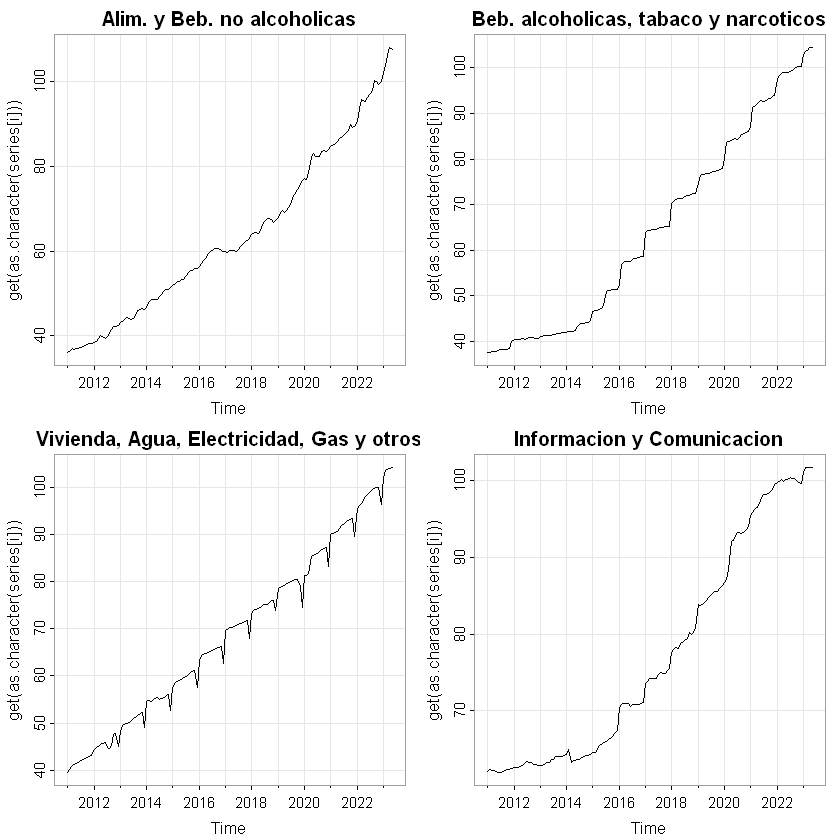

In [1]:
# Instalo las librerias que necesito
rm(list=ls())
gc()
library(astsa, quietly = T)
library(forecast, quietly = T)

# Cargo los datos de un csv que previamente fue subido a github
url <- "https://raw.githubusercontent.com/javiernunez1991/Oblig_Series_Temporales/main/Series.csv"
df <- read.csv(url, sep=";")
df <- na.omit(df)

# Elijo 4 series (dos de Transables y dos de No Transables) que sean lo mas diferentes posibles 
serie1 <- ts(data=df$Alimentos.Y.Bebidas.No.Alcohólicas, start = 2011, frequency=12)
serie2 <- ts(data=df$Bebidas.Alcohólicas..Tabaco.Y.Narcóticos, start = 2011, frequency=12)
serie3 <- ts(data=df$Vivienda..Agua..Electricidad..Gas.Y.Otros.Combustibles, start = 2011, frequency=12)
serie4 <- ts(data=df$Información.Y.Comunicación, start = 2011, frequency=12)

nombres <- list("Alim. y Beb. no alcoholicas",
                "Beb. alcoholicas, tabaco y narcoticos",
                "Vivienda, Agua, Electricidad, Gas y otros",
                "Informacion y Comunicacion")
series <- list("serie1", "serie2", "serie3", "serie4")

# Elijo 4 series (dos de Transables y dos de No Transables) que sean lo mas diferentes posibles 
par(mfrow=c(2,2))
for(i in 1:length(series)){
    tsplot(get( as.character(series[i]) ), main=nombres[[i]]) # serie con tendencia creciente
}

#### Genero los grupos de Train y Validation

In [2]:
# Genero las series para train y validation
largo_series <- nrow(df)
meses_a_pred <- 7
serie1_train <- ts(serie1[ 1:(largo_series-meses_a_pred) ], start = 2011, frequency=12)
serie2_train <- ts(serie2[ 1:(largo_series-meses_a_pred) ], start = 2011, frequency=12)
serie3_train <- ts(serie3[ 1:(largo_series-meses_a_pred) ], start = 2011, frequency=12)
serie4_train <- ts(serie4[ 1:(largo_series-meses_a_pred) ], start = 2011, frequency=12)
serie1_validation <- ts(tail(serie1, meses_a_pred), start=2022 + 10/12 , frequency=12)
serie2_validation <- ts(tail(serie2, meses_a_pred), start=2022 + 10/12 , frequency=12)
serie3_validation <- ts(tail(serie3, meses_a_pred), start=2022 + 10/12 , frequency=12)
serie4_validation <- ts(tail(serie4, meses_a_pred), start=2022 + 10/12 , frequency=12)

vector_series_tr <- list("serie1_train", "serie2_train", "serie3_train", "serie4_train")
vector_series_val <- list("serie1_validation", "serie2_validation", "serie3_validation", "serie4_validation")

### 2. Ajuste de las series con algoritmo autoarima

[1] "La serie Alim. y Beb. no alcoholicas --> se ajusto con autorima y genero un -->  ARIMA(2,2,3)(1,0,0)[12]"
[1] "La serie Beb. alcoholicas, tabaco y narcoticos --> se ajusto con autorima y genero un -->  ARIMA(0,1,1)(1,1,1)[12]"
[1] "La serie Vivienda, Agua, Electricidad, Gas y otros --> se ajusto con autorima y genero un -->  ARIMA(1,1,1)(0,1,1)[12]"
[1] "La serie Informacion y Comunicacion --> se ajusto con autorima y genero un -->  ARIMA(0,2,1)(1,0,1)[12]"


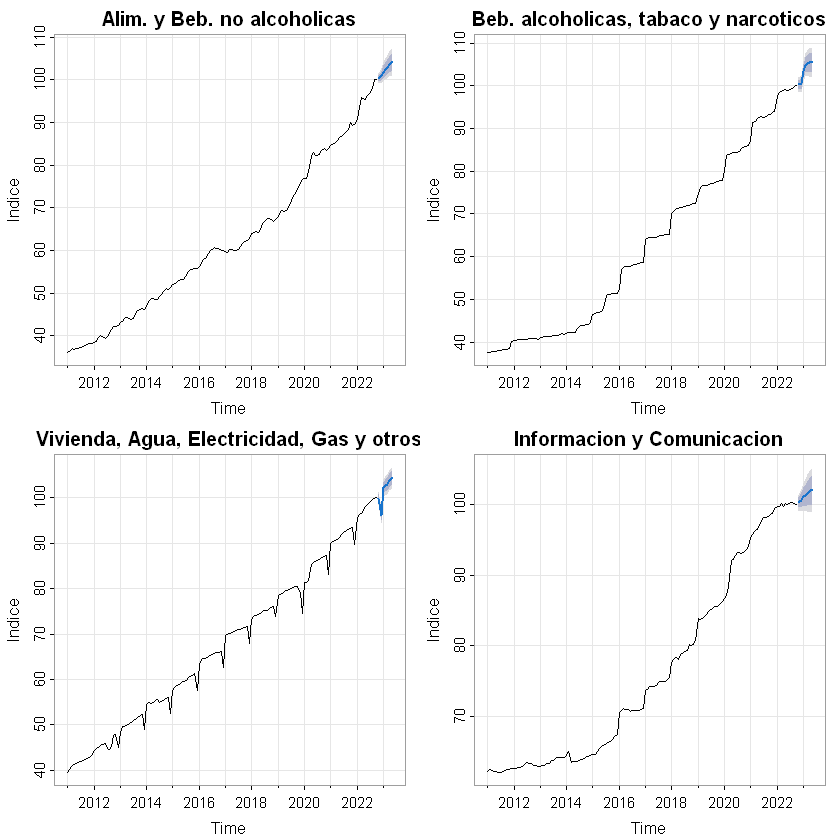

In [3]:
# Entreno las series con algoritmos auto.arima, y genero las predicciones
vector_modelos <- list() 
vector_arima_orders <- list()
vector_predicciones <- list()
diferencias <- list()

# Grafico las predicciones con su intervalo de confianza
par(mfrow=c(2,2))
for(i in 1:length(vector_series_tr)){
  r <- get(vector_series_tr[[i]])
  fit <- auto.arima(r)
  vector_modelos[[i]] <- fit
  vector_arima_orders[[i]] <- arimaorder(fit)
  vector_predicciones[[i]] <- forecast(vector_modelos[[i]], h=meses_a_pred)
  print(paste("La serie", nombres[[i]], "--> se ajusto con autorima y genero un --> ", vector_predicciones[[i]]$method ))
  diferencias[[i]] <- vector_predicciones[[i]]$mean - get(vector_series_val[[i]])
  tsplot(vector_predicciones[[i]], main=nombres[[i]], ylab="Indice")
}

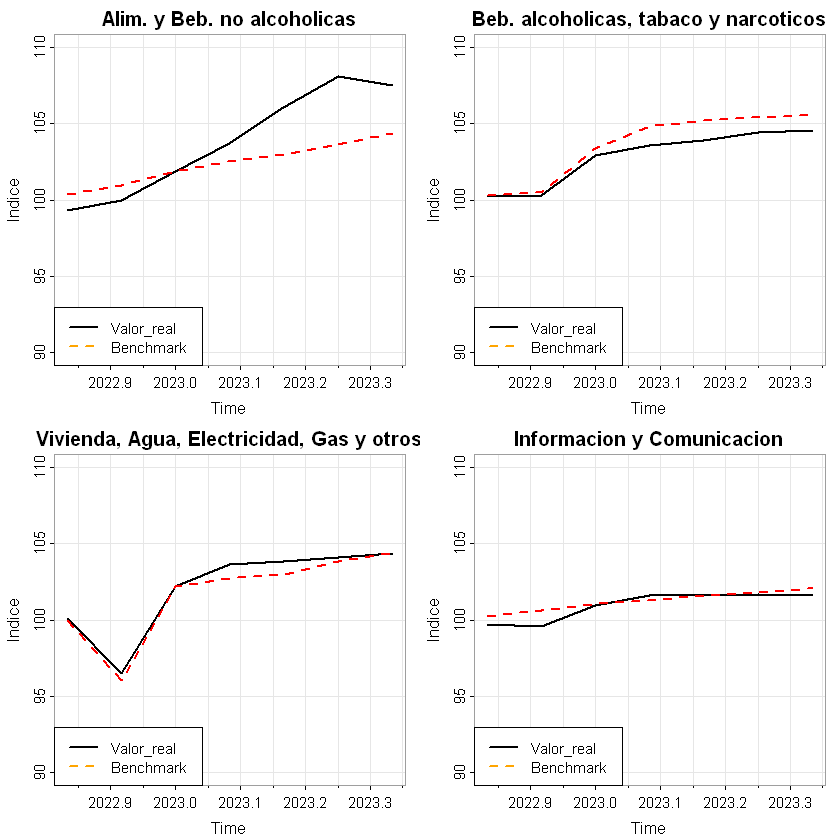

In [4]:
# Grafico los valores reales de la serie vs la prediccion generada con auto.arima
par(mfrow=c(2,2))
for(i in 1:length(vector_series_tr)){
  tsplot(get(vector_series_val[[i]]), main=nombres[[i]], 
         lwd=2, ylim=c(90,110), ylab="Indice")
  lines(vector_predicciones[[i]]$mean, col="red", 
        lwd=2, lty="dashed")
  legend("bottomleft", legend=c("Valor_real", "Benchmark"), 
         col=c("black", "orange"), lty=c(1,2), cex=0.9, lwd=c(2,2))
}

### 3. Analisis de Series

Al ser series economicas que presentan tendencia, es recomendable aplicarles diferenciación (diff(log)) y estudiar sus crecimientos porcentuales

#### 3.1 Alimentos y Bebidas no Alcohólicas

In [ ]:
par(mfrow=c(1,1), cex.lab=0.7)
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=120)
serie1 <- ts(data=df$Alimentos.Y.Bebidas.No.Alcohólicas, start = 2011, frequency=12)
serie1 <- diff(log(serie1))
tsplot(serie1, main="diff(log( serie1 ))", cex.main=0.8, ylab="%", cex.axis=20)

In [ ]:
par(mfrow=c(1,2), cex.main=0.8, cex.lab=0.7, cex.axis=0.7)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=120)
acf(serie1, main="ACF serie1")
pacf(serie1, main="PACF serie1")

#### 3.2 Bebidas Alcohólicas, Tabaco y Narcóticos

In [ ]:
par(mfrow=c(1,1), cex.lab=0.7)
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=120)
serie2 <- ts(data=df$Bebidas.Alcohólicas..Tabaco.Y.Narcóticos, start = 2011, frequency=12)
serie2 <- diff(log(serie2))
tsplot(serie2, main="diff(log( serie2 ))", cex.main=0.8, ylab="%", cex.axis=20)

In [ ]:
par(mfrow=c(1,2), cex.main=0.8, cex.lab=0.7, cex.axis=0.7)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=120)
acf(serie2, main="ACF serie1")
pacf(serie2, main="PACF serie1")

#### 3.3 Vivienda, Agua, Electricidad, Gas y otros

In [ ]:
par(mfrow=c(1,1), cex.lab=0.7)
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=120)
serie3 <- ts(data=df$Vivienda..Agua..Electricidad..Gas.Y.Otros.Combustibles, start = 2011, frequency=12)
serie3 <- diff(log(serie3))
tsplot(serie3, main="diff(log( serie3 ))", cex.main=0.8, ylab="%", cex.axis=20)

In [ ]:
par(mfrow=c(1,2), cex.main=0.8, cex.lab=0.7, cex.axis=0.7)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=120)
acf(serie1, main="ACF serie1")
pacf(serie1, main="PACF serie1")

In [ ]:
par(mfrow=c(1,2), cex.main=0.8, cex.lab=0.7, cex.axis=0.7)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=120)
acf(serie3, main="ACF serie1")
pacf(serie3, main="PACF serie1")

#### 3.4 Información y Comunicaciòn

In [ ]:
par(mfrow=c(1,1), cex.lab=0.7)
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=120)
serie4 <- ts(data=df$Información.Y.Comunicación, start = 2011, frequency=12)
serie4 <- diff(log(serie4))
tsplot(serie4, main="diff(log( serie4 ))", cex.main=0.8, ylab="%", cex.axis=20)

In [ ]:
par(mfrow=c(1,2), cex.main=0.8, cex.lab=0.7, cex.axis=0.7)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=120)
acf(serie4, main="ACF serie1")
pacf(serie4, main="PACF serie1")